## Week 1. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

In [67]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

**Peeking how to implement pdf function**

In [68]:
print(inspect.getsource(scipy.stats.norm._pdf))

print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



### Part 1. Plotting Likelihood, Prior, and Posterior

In [69]:
# Likelihood

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [70]:
def plotting6(n, y, a0, b0):

# Prior
    prior = st.beta(a=a0, b=b0)

# Posterior
    post = st.beta(a=a0+n, b=b0+(n-y))

# plotting
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    plt.plot(thetas, (10**5)*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

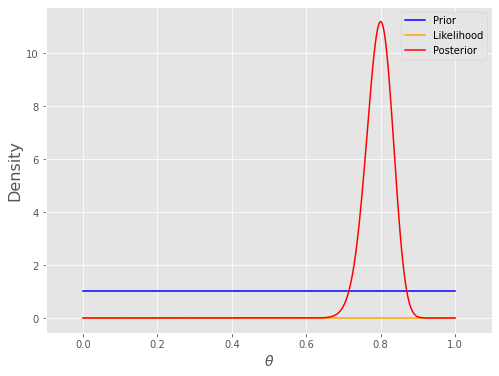

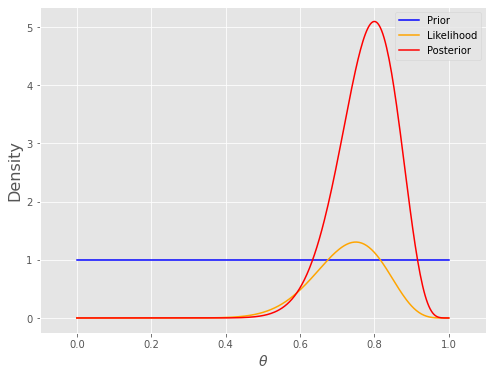

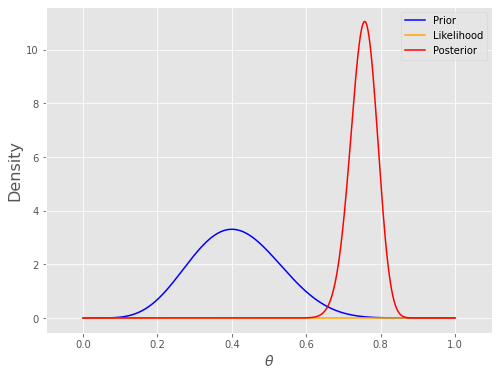

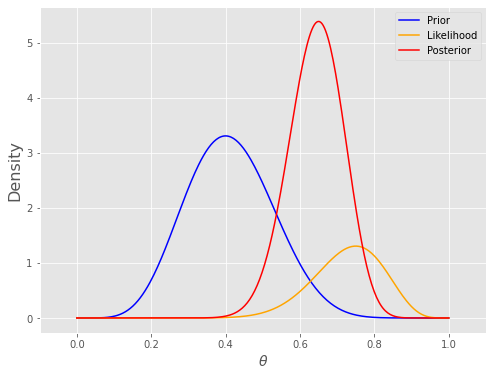

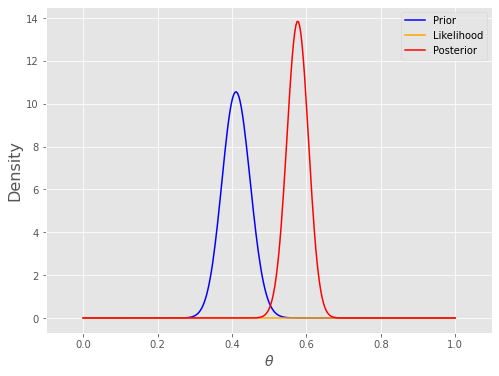

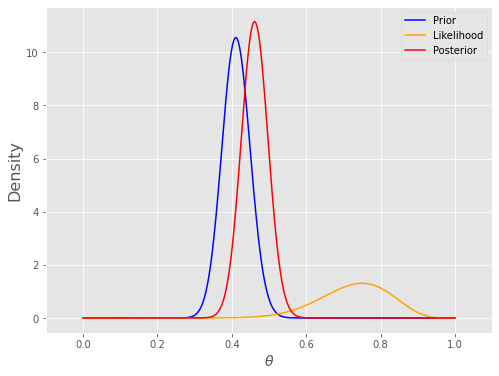

In [71]:
#strong likelihood, uninf prior
plotting6(n=100, y=75, a0=1, b0=1)
#weak likelihood, uninf prior
plotting6(n=20, y=15, a0=1, b0=1)
#strong likelihood, weak prior
plotting6(n=100, y=75, a0=7, b0=10)
#weak likelihood, weak prior
plotting6(n=20, y=15, a0=7, b0=10)
#strong likelihood, strong prior
plotting6(n=100, y=75, a0=70, b0=100)
#weak likelihood, strong prior
plotting6(n=20, y=15, a0=70, b0=100)

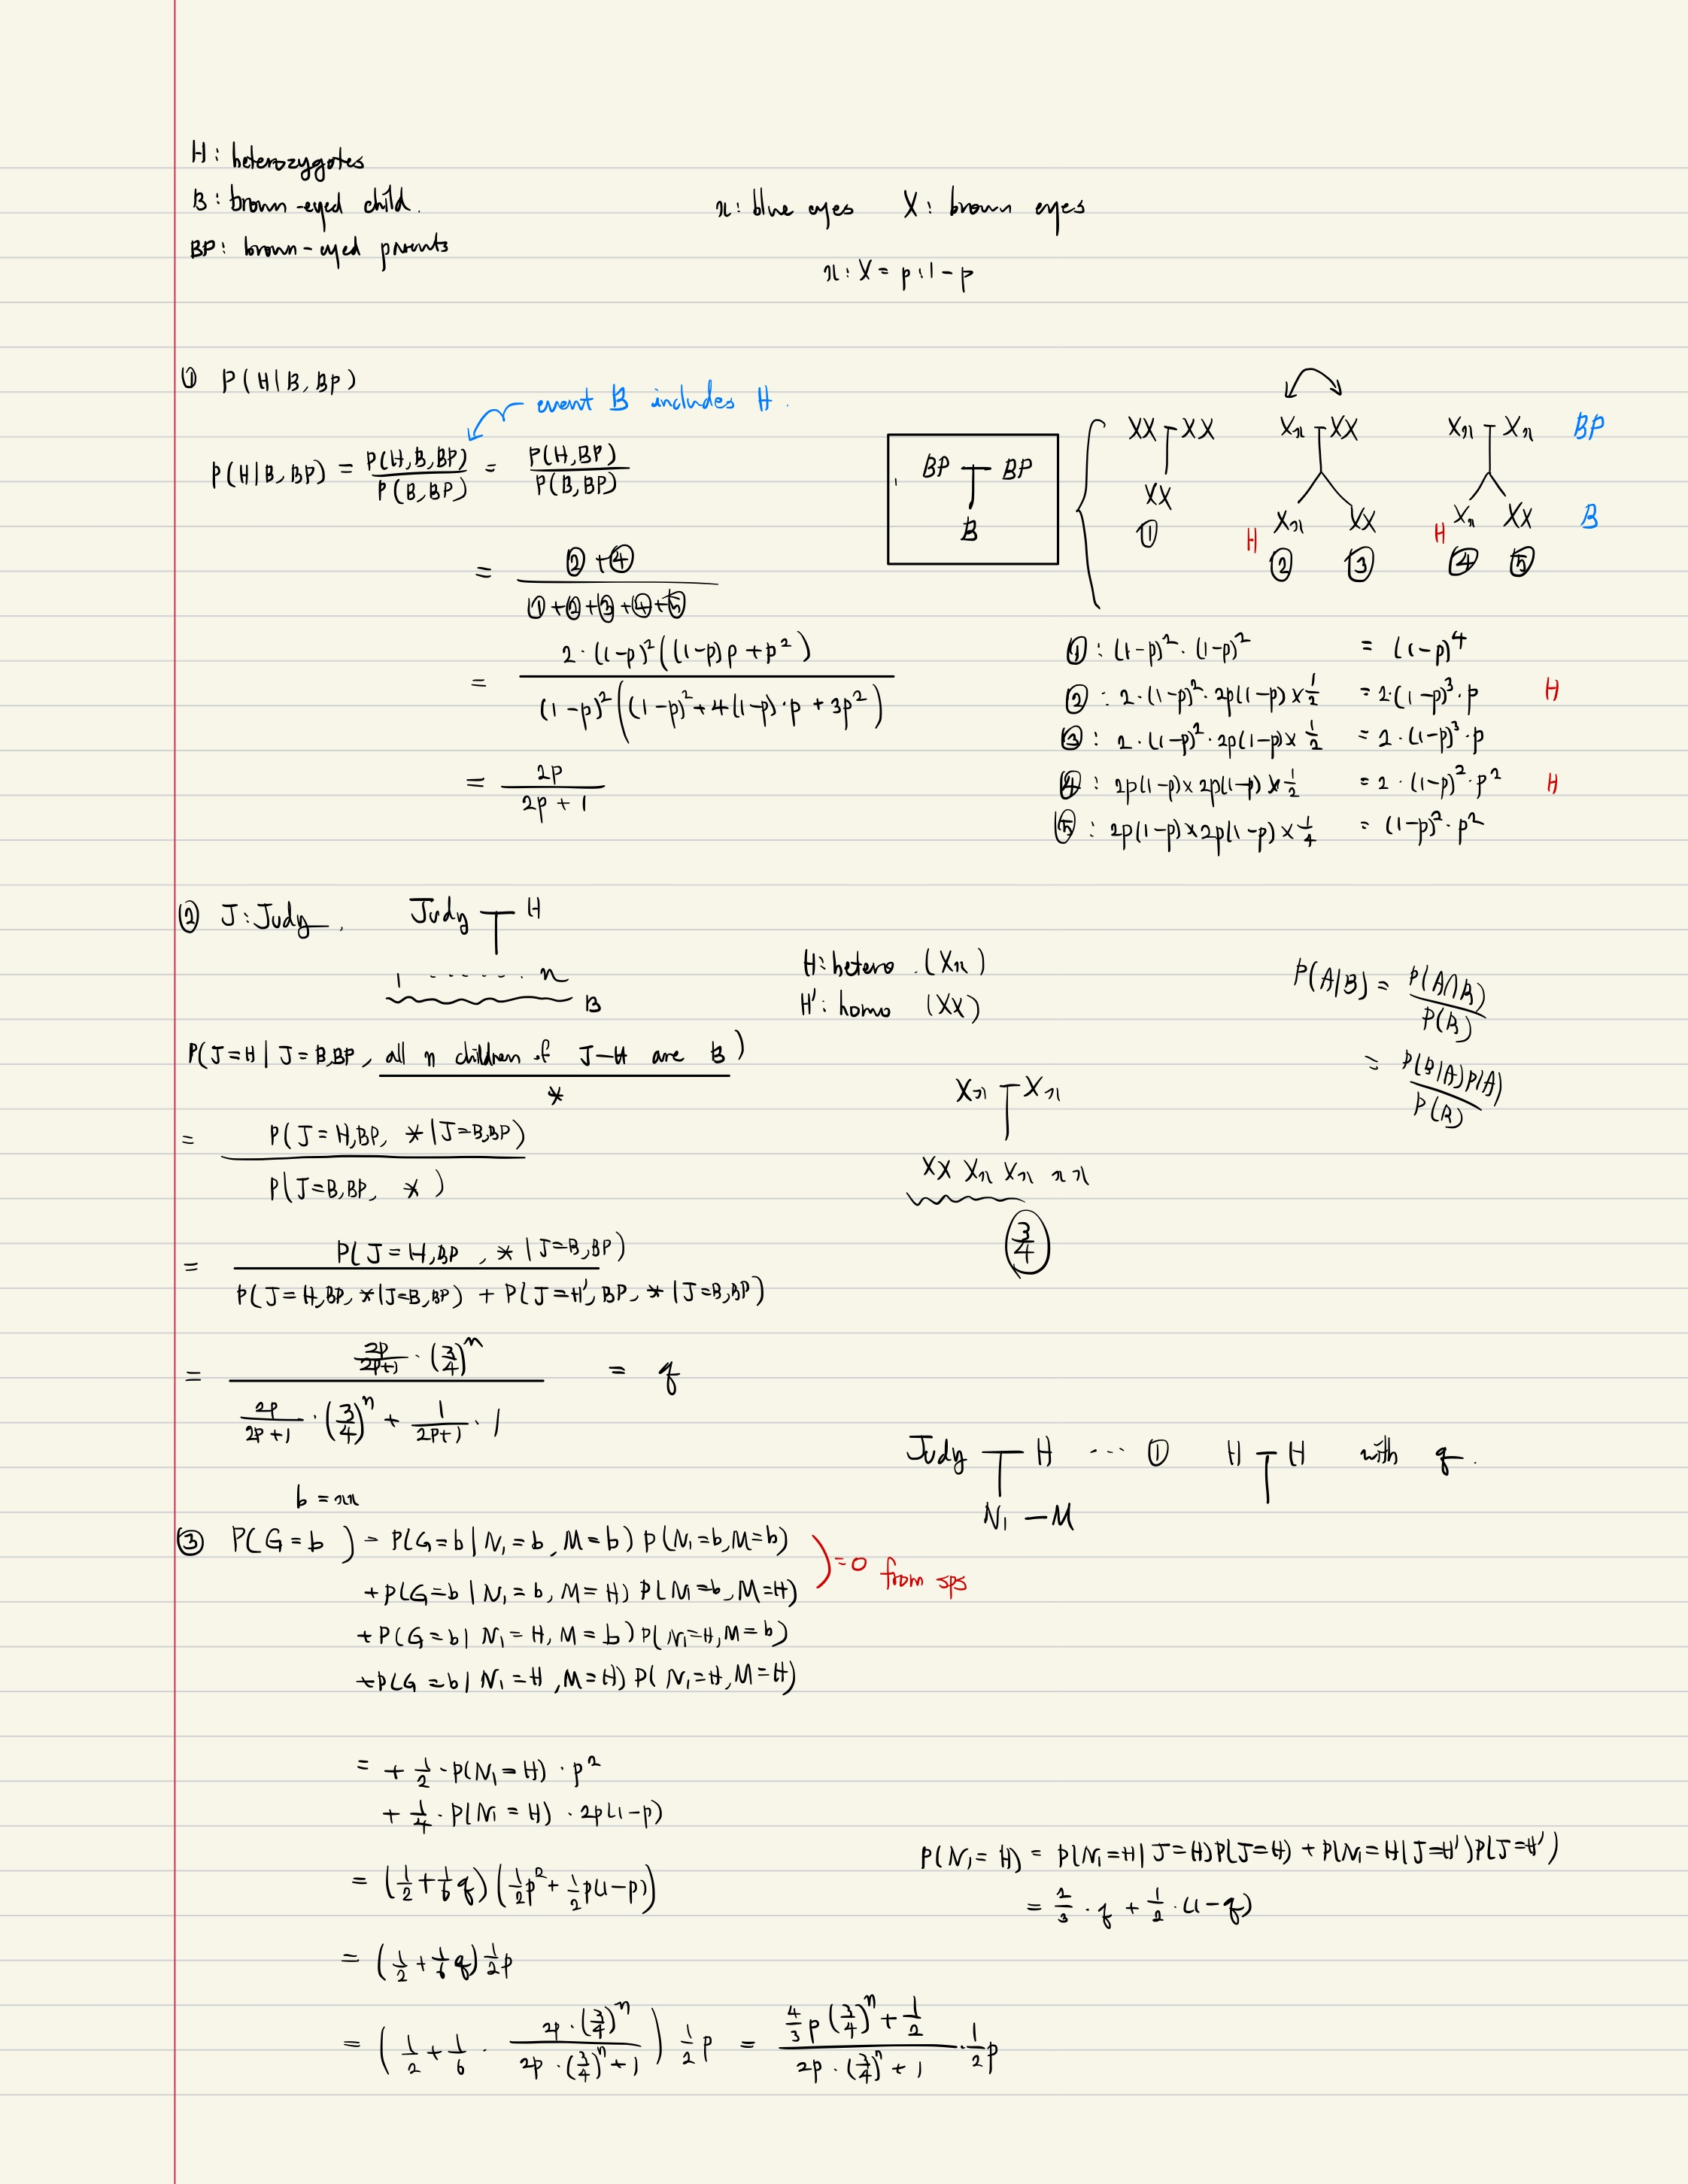

In [72]:
#Pb 2
from IPython.display import Image
 
Image("img/p2.jpg")




### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

In [73]:
#Pb3

# prior setting !    dbeta(a=9n, b=n) to get E[theta]=0.9, now choose proper n

# P(0.8 =< theta =< 0.97) >0.95

In [74]:
n=5
st.beta.cdf(0.97, 9*n, n) - st.beta.cdf(0.80, 9*n, n)

0.9630476420328056

In [75]:
#3-a)
#at n=5,
a=9*n
b=n
print('a =',a,'b =',b)

a = 45 b = 5


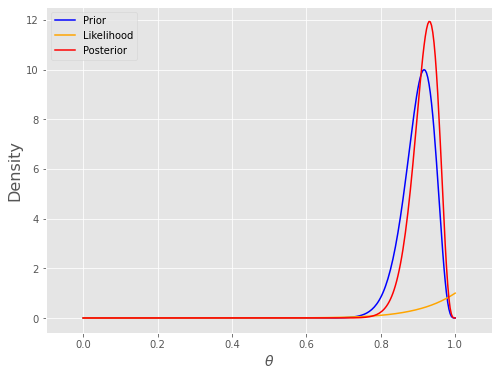

In [76]:
#3-b)
prior=st.beta(a,b)
post=st.beta(a+10, b+10-10)
#n=10, y=10 (10 successes of 10 Bernoulli trials)

thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, 10, 10), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

In [77]:
#3-c)
prob=post.mean()
print(prob)

0.9166666666666666


In [78]:
1-prob**20-20*(prob**19)*(1-prob)

0.5054641376518497